# Analisis Bivariado
En esta parte del proyecto analizaremos las variables que extrajimos anteriormente de nuestra API y las compararemos con la capitalización de mercado. Sabemos por teoría que la capitalización de mercado está atada directamente con el tamaño de una empresa, no obstante, ¿existe alguna relación entre los índices económicos de una empresa y su capitalización de mercado? Averigüémoslo

In [2]:
# Librereas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as MMS

# Datos
api_df = pd.read_csv('https://media.githubusercontent.com/media/Gonzalo-Ariel-Alonso/Proyecto_Data_Science/master/API_dataset_cleaned.csv',index_col = 0)

# Escalado de datos
scaler = MMS()
api_df_scaled = scaler.fit_transform(api_df)
api_df_scaled = pd.DataFrame(api_df_scaled, columns = list(api_df.columns),index = api_df.index)
api_df_scaled 

,Debt ratio %,Current Liability to Assets,Borrowing dependency (Debt To Equity),Current Liability to Current Assets,Net Income to Total Assets,Net worth/Assets,Persistent EPS in the Last Four Seasons (EPS),Working Capital/total assets,Market Cap.
AAPL,0.327802,0.361560,0.646733,0.216566,0.917661,0.396472,0.298776,0.170780,1.000000
ABBV,0.462790,0.179966,1.000000,0.201851,0.515525,0.380429,0.308980,0.183143,0.085309
ABNB,0.108832,0.022110,0.486483,0.005480,0.582070,0.564869,0.235918,0.606103,0.030078
ABT,0.220347,0.182642,0.460359,0.123950,0.531405,0.686100,0.253061,0.321844,0.062635
ACN,0.052445,0.091534,0.447781,0.046045,0.642802,0.665274,0.395102,0.324095,0.065264
...,...,...,...,...,...,...,...,...,...
WMT,0.256580,0.163796,0.539889,0.120808,0.436246,0.538610,0.260816,0.121287,0.139676
XEL,0.427679,0.215305,0.620667,0.589029,0.399591,0.503363,0.237959,0.168073,0.011270
XOM,0.104225,0.010258,0.458251,0.008987,0.659357,0.715670,0.443878,0.273868,0.139695
ZM,0.000000,0.016822,0.434658,0.004946,0.367818,0.910675,0.180408,0.772174,0.006893


## Mapa de calor
Para responder la pregunta que nos planteamos observemos un mapa de calor donde cada caja representa la correlación la correlación entre dos variables. 
Como todas nuestras variables son de tipo numérica de intervalo utilizaremos el coeficiente de Pearson

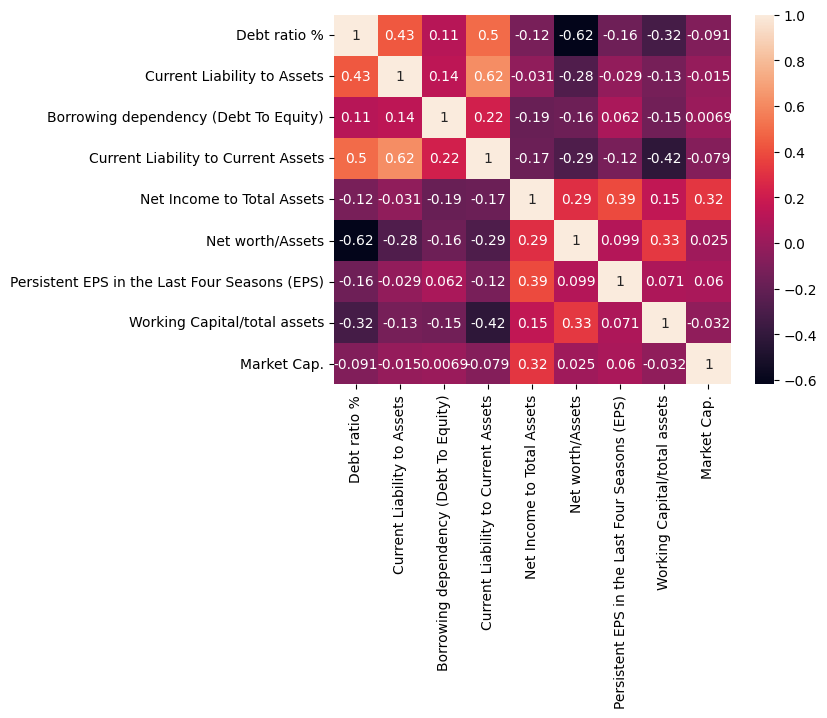

In [3]:
sns.heatmap(api_df_scaled .corr(), annot = True)
plt.show()

Podemos apreciar que la capitalizacion de mercado no posee ningua correlacion fuerte con nuestras variables economicas, no obstante, podemos observar una correlacion debil de 0.32 entre la capitalizacion de mercado y 'Net Income to Total Assets'

## Net Income to Total Assets
Recordemos que "Net Income to Total Assets" es un indicador financiero que se utiliza para evaluar la rentabilidad y la eficiencia de una empresa. Se traduce como "Ingreso Neto sobre Activos Totales". Es una métrica que muestra cuántos beneficios netos genera una empresa en relación con el tamaño de sus activos totales.
Evaluemosla graficamente contra la capitalizacion de mercado para corroborar si efectivamente hay una correlacion.

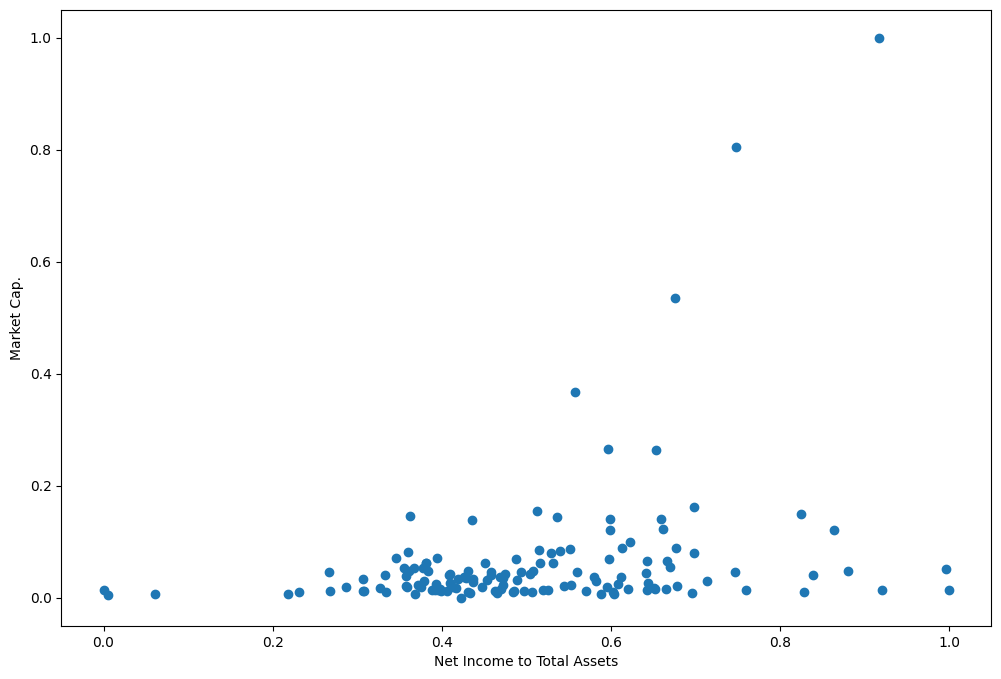

In [95]:
plt.figure(figsize = (12,8))
plt.xlabel('Net Income to Total Assets')
plt.ylabel('Market Cap.')
plt.scatter(x = api_df_scaled['Net Income to Total Assets'], y = api_df_scaled['Market Cap.'])
plt.show()

Graficamente esta correlacion no es apreciable, especialmente por las 4 empresas con mayor capitalizacion de mercado, que se comportan como valores atipicos, grafiquemos nuevamente sin tener en cuenta estos 4 empresas.

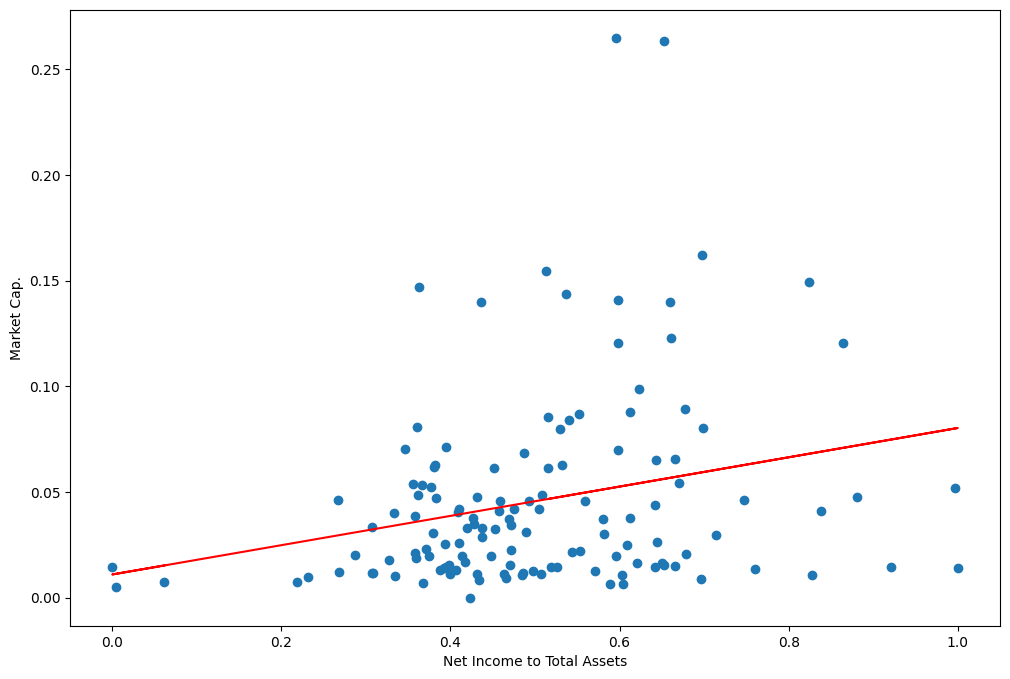

In [116]:
# Datos
filt = api_df_scaled['Market Cap.'] < 0.35
x = api_df_scaled['Net Income to Total Assets'][filt]
y = api_df_scaled['Market Cap.'][filt]

# Figura
plt.figure(figsize = (12,8))
plt.xlabel('Net Income to Total Assets')
plt.ylabel('Market Cap.')
plt.scatter(x = x, y = y)

# Regrecion lineal
coefficients = np.polyfit(api_df_scaled['Net Income to Total Assets'][filt], api_df_scaled['Market Cap.'][filt], 1)
regression_line = np.poly1d(coefficients)
plt.plot(x, regression_line(x), color='r', label='Regresión lineal')

plt.show()

Eliminando las 4 empresas que se comportaban como outliers
 y graficando una línea de regresión de todos los puntos podemos concluir que efectivamente hay una correlación moderada entre la capitalización de mercado y el 'Net Income to Total Assets'.